In [1]:
import time
from pprint import pprint
import numpy as np

from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler

import gladier.tests
from gladier.client import GladierClient as GladierBaseClient

In [2]:
class KanzusTriggers:
    def __init__(self, folder_path):
        self.observer = Observer()
        self.folder_path = folder_path

    def run(self):
        print("Kanzus Triggers Started")

        event_handler = Handler()
        self.observer.schedule(event_handler, self.folder_path, recursive = True)
        self.observer.start()
        try:
            while True:
                time.sleep(1)
        except:
            self.observer.stop()
            print("Kanzus Triggers Stopped")
  
        self.observer.join()

class Handler(FileSystemEventHandler):
    @staticmethod
    def on_any_event(event):
        if event.is_directory:
            return None
        elif event.event_type == 'created':

            #event.src_path is the file watchdog found
            # Event is created, you can process it now
            KanzusLogic(event.src_path,f_pattern=None,f_ext=None, n_batch=256)
  

def KanzusLogic(cbf_file,f_pattern=None,f_ext=None, n_batch=256):
    if not f_pattern:
        f_pattern = r'(\w+)_(\d+)_\d+.cbf'
    cbf_parse = re.compile(f_pattern)
    cbf_parse(cbf_file)
    print(cbf_file, cbf_parse)

        ##cbf is created
        ##n_batch runs plot
        ##cbf name  %n_batch==0
        ## 


# exp = KanzusTriggers('.')
# exp.run()

In [3]:
from gladier_kanzus.flows.search_flow import flow_definition

class KanzusXYSearchClient(GladierBaseClient):
    client_id = 'e6c75d97-532a-4c88-b031-8584a319fa3e'

    gladier_tools = [
        'gladier_kanzus.tools.XYSearch',
        'gladier_kanzus.tools.CreatePhil',
        'gladier_kanzus.tools.DialsStills',
        'gladier_kanzus.tools.XYPlot',
    ]
    flow_definition = flow_definition


search_client = KanzusXYSearchClient()

[DEBUG] gladier.client::__init__() No authorizers provided, loading from disk.


In [4]:
from funcx.sdk.client import FuncXClient
fxc = FuncXClient()
from gladier_kanzus.tools.dials_stills import funcx_stills_process as stills_cont
cont_dir =  '/home/rvescovi/.funcx/containers/'
container_name = "dials_v1.simg"
dials_cont_id = fxc.register_container(location=cont_dir+'/'+container_name,container_type='singularity')
stills_cont_fxid = fxc.register_function(stills_cont, container_uuid=dials_cont_id)

In [9]:
##theta
conf = {'local_endpoint': '8f2f2eab-90d2-45ba-a771-b96e6d530cad',
        'queue_endpoint': '23519765-ef2e-4df2-b125-e99de9154611',
        }
# conf = {'local_endpoint': '8f2f2eab-90d2-45ba-a771-b96e6d530cad',
        # 'queue_endpoint': '8f2f2eab-90d2-45ba-a771-b96e6d530cad',
        # }
##cooley
# conf = {'local_endpoint': '83e95e2e-fd70-45ea-9467-5efe5d95ff11',
#         'queue_endpoint': 'd26622fb-3bef-44df-8874-fcfdfbcc29fd',
#         }

data_dir = '/eagle/APSDataAnalysis/SSX/Demo/test'
proc_dir = f'{data_dir}/xy'
upload_dir = f'{data_dir}/test_images'

flow_input = {
    "input": {
        #Processing variables
        "proc_dir": proc_dir,
        "data_dir": data_dir,
        "upload_dir": upload_dir,

        #Dials specific variables.
        "input_files": "Ohakune_33_{00000..00100}.cbf", 
        "input_range": "00000..00100",
        "nproc": 10,
        "beamx": "-214.400",
        "beamy": "218.200",
        "step": "0.3",

        # funcX endpoints
        "funcx_local_ep": conf['local_endpoint'],
        "funcx_queue_ep": conf['queue_endpoint'],

        # container hack for stills
        "stills_cont_fxid": stills_cont_fxid
    }
}


In [10]:
pprint(flow_input['input'])

{'beamx': '-214.400',
 'beamy': '218.200',
 'data_dir': '/eagle/APSDataAnalysis/SSX/Demo/test',
 'funcx_local_ep': '8f2f2eab-90d2-45ba-a771-b96e6d530cad',
 'funcx_queue_ep': '23519765-ef2e-4df2-b125-e99de9154611',
 'input_files': 'Ohakune_33_{00000..00100}.cbf',
 'input_range': '00000..00100',
 'nproc': 10,
 'proc_dir': '/eagle/APSDataAnalysis/SSX/Demo/test/xy',
 'step': '0.3',
 'stills_cont_fxid': '155c183e-a792-4cad-851e-871ca82aef5c',
 'upload_dir': '/eagle/APSDataAnalysis/SSX/Demo/test/test_images'}


In [11]:
phils_flow = search_client.start_flow(flow_input=flow_input)

[DEBUG] gladier.client::get_funcx_function_ids() Checking functions for <gladier_kanzus.tools.XYSearch object at 0x7fd21f0375e0>
[DEBUG] gladier.client::get_funcx_function_ids() Checking functions for <gladier_kanzus.tools.CreatePhil object at 0x7fd21f037a60>
[DEBUG] gladier.client::get_funcx_function_ids() Checking functions for <gladier_kanzus.tools.DialsStills object at 0x7fd21f037550>
[DEBUG] gladier.client::get_funcx_function_ids() Checking functions for <gladier_kanzus.tools.XYPlot object at 0x7fd21f037f70>
[INFO] gladier.client::get_funcx_function_ids() Registering function xy_plot_funcx_id
[DEBUG] gladier.config::save() Saved local gladier config to <_io.TextIOWrapper name='gladier.cfg' mode='w' encoding='UTF-8'>
[INFO] gladier.client::register_flow() Flow checksum failed, updating flow e79bb595-4efc-4389-872c-12469ad27262...
[DEBUG] gladier.config::save() Saved local gladier config to <_io.TextIOWrapper name='gladier.cfg' mode='w' encoding='UTF-8'>
[INFO] gladier.client::start

In [8]:
data = {"X": [214.9, 214.0, 214.9, 214.3, 214.0, 214.6, 214.3, 213.7, 214.3, 213.7, 214.9, 214.6, 213.7, 214.9, 214.6, 214.3, 213.7, 214.0, 214.9, 214.3, 214.6, 214.0, 214.0, 214.6, 213.7], "Y": [218.9, 218.0, 218.0, 218.3, 218.9, 218.0, 218.0, 218.0, 217.7, 218.6, 218.3, 218.9, 218.3, 218.6, 217.7, 218.9, 217.7, 218.3, 217.7, 218.6, 218.3, 217.7, 218.6, 218.6, 218.9], "Ints": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0]}

In [13]:
import pandas as pd
df = pd.DataFrame(data)

In [14]:
df

,X,Y,Ints
0,214.9,218.9,0
1,214.0,218.0,0
2,214.9,218.0,0
3,214.3,218.3,0
4,214.0,218.9,0
5,214.6,218.0,0
6,214.3,218.0,0
7,213.7,218.0,0
8,214.3,217.7,0
9,213.7,218.6,0


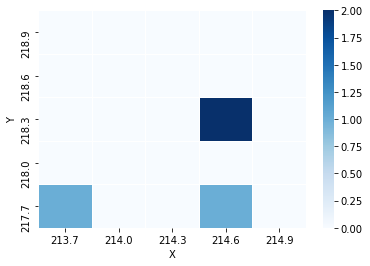

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import glob

table = df.pivot('Y', 'X', 'Ints')
ax = sb.heatmap(table, linewidths=0.5, cmap="Blues")
ax.invert_yaxis()
# plt.savefig('xysearch.png', bbox_inches='tight', dpi=100)
